# Plus proches voisins - évaluation


Comment évaluer la pertinence d'un modèle des plus proches voisins.

In [1]:
%matplotlib inline

In [2]:
from teachpyx.datasets import load_wines_dataset

df = load_wines_dataset()
X = df.drop(["quality", "color"], axis=1)
y = df["quality"]

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X, y)

KNeighborsRegressor(n_neighbors=1)

In [4]:
prediction = knn.predict(X)

Le modèle ne fait pas d'erreur sur tous les exemples de la base de vins. C'est normal puisque le plus proche voisin d'un vin est nécessairement lui-même, la note prédite et la sienne.

In [5]:
min(prediction - y), max(prediction - y)

(0.0, 0.0)

Il est difficile dans ces conditions de dire si la prédiction et de bonne qualité. On pourrait estimer la qualité de la prédiction sur un vin nouveau mais il n'y en a aucun pour le moment et ce n'est pas l'ordinateur qui va les fabriquer. On peut peut-être regarder combien de fois le plus proche voisin d'un vin autre que le vin lui-même partage la même note.

In [6]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=2)
nn.fit(X)

NearestNeighbors(n_neighbors=2)

In [7]:
distance, index = nn.kneighbors(X)
proche = index[:, 1].ravel()
note_proche = [y[i] for i in proche]

Il ne reste plus qu'à calculer la différence entre la note d'un vin et celle de son plus proche voisin autre que lui-même.

Text(0.5, 1.0, 'Histogramme des différences\nde prédiction')

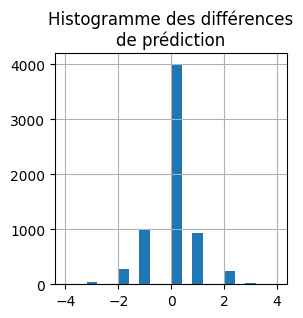

In [8]:
diff = y - note_proche
ax = diff.hist(bins=20, figsize=(3, 3))
ax.set_title("Histogramme des différences\nde prédiction")

Ca marche pour les deux tiers de la base, pour le tiers restant, les notes diffèrent. On peut maintenant regarder si la distance entre ces deux voisins pourrait être corrélée à cette différence.

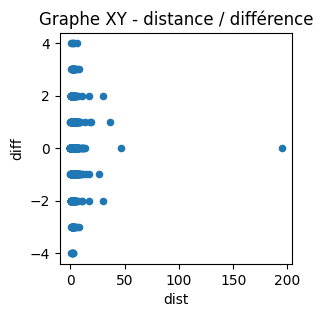

In [9]:
import pandas

dif = pandas.DataFrame(dict(dist=distance[:, 1], diff=diff))
ax = dif.plot(x="dist", y="diff", kind="scatter", figsize=(3, 3))
ax.set_title("Graphe XY - distance / différence");

Ce n'est pas très lisible. Essayons un autre type de graphique.

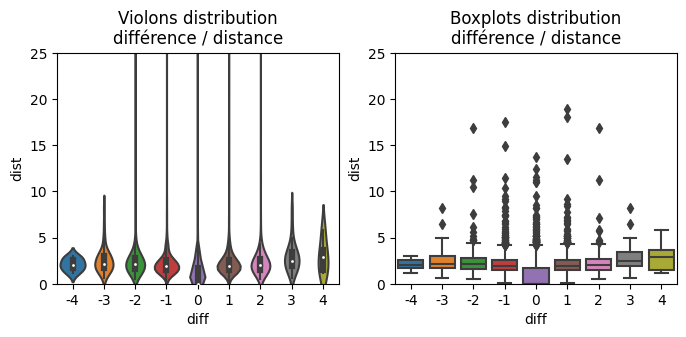

In [10]:
from seaborn import violinplot, boxplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
violinplot(x="diff", y="dist", data=dif, ax=ax[0])
ax[0].set_ylim([0, 25])
ax[0].set_title("Violons distribution\ndifférence / distance")
boxplot(x="diff", y="dist", data=dif, ax=ax[1])
ax[1].set_title("Boxplots distribution\ndifférence / distance")
ax[1].set_ylim([0, 25]);

A priori le modèle n'est pas si mauvais, les voisins partageant la même note ont l'air plus proches que ceux qui ont des notes différentes.

In [11]:
import numpy

dif["abs_diff"] = numpy.abs(dif["diff"])

/home/xadupre/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/xadupre/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/xadupre/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/xadupre/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

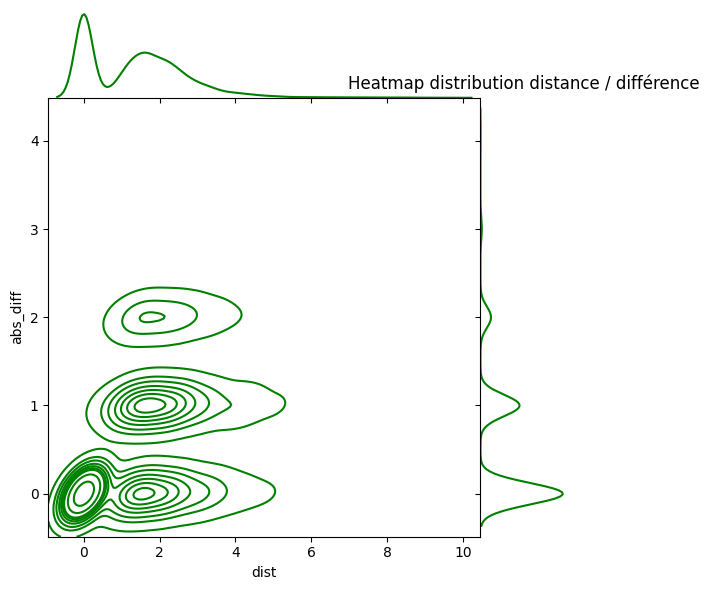

In [18]:
from seaborn import jointplot

ax = jointplot(
    dif[dif.dist <= 10], x="dist", y="abs_diff", kind="kde", space=0, color="g"
)
ax.ax_marg_y.set_title("Heatmap distribution distance / différence");

Les vins proches se ressemblent pour la plupart. C'est rassurant pour la suite. 61% des vins ont un voisin proche partageant la même note.

In [19]:
len(dif[dif["abs_diff"] == 0]) / dif.shape[0]

0.6152070186239803